In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

You should consider upgrading via the 'C:\Users\utkar\TensorFlow Object Detection\TFODCourse\tfod\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}
print("ss")

In [ ]:
# Install Tensorflow Object Detection 

if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

In [13]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.6: C:\Users\utkar\TensorFlow Object Detection\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-04-17 15:03:43.771427: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-17 15:03:45.460813: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2149 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5
C:\Users\utkar\TensorFlow Object Detection\TFODCourse\Tensorflow\models\research\object_detection\builders\model_builder.py:1091: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.

I0417 15:04:10.007962  7600 efficientnet_model.py:147] round_filter input=24 output=48
I0417 15:04:10.798606  7600 efficientnet_model.py:147] round_filter input=24 output=48
I0417 15:04:10.798606  7600 efficientnet_model.py:147] round_filter input=40 output=80
I0417 15:04:11.277207  7600 efficientnet_model.py:147] round_filter input=40 output=80
I0417 15:04:11.277207  7600 efficientnet_model.py:147] round_filter input=80 output=160
I0417 15:04:12.009126  7600 efficientnet_model.py:147] round_filter input=80 output=160
I0417 15:04:12.009126  7600 efficientnet_model.py:147] round_filter input=112 output=224
I0417 15:04:12.792083  7600 efficientnet_model.py:147] round_filter input=112 output=224
I0417 15:04:12.792083  7600 efficientnet_model.py:147] round_filter input=192 output=384
I0417 15:04:13.564727  7600 efficientnet_model.py:147] round_filter input=192 output=384
I0417 15:04:13.564727  7600 efficientnet_model.py:147] round_filter input=320 output=640
I0417 15:04:13.801049  7600 eff

In [ ]:
!pip install tf-models-official

In [ ]:
!pip install tensorflow==2.6.0 tensorflow-gpu==2.6.0

In [7]:
import object_detection

In [9]:
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

 11% [........                                                                ]  2416640 / 20515344

 23% [................                                                        ]  4743168 / 20515344

 35% [.........................                                               ]  7249920 / 20515344

 47% [.................................                                       ]  9658368 / 20515344

 52% [.....................................                                   ] 10723328 / 20515344

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [8]:
labels = [{'name':'livelong', 'id':1}, {'name':'ok', 'id':2}, {'name':'thankyou', 'id':3}, {'name':'coronavirus', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [9]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [10]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [11]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [9]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format


In [13]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [14]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [15]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [16]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [17]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [18]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [22]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [23]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [ ]:
!pip install absl-py==0.12.0

In [ ]:
!{command}

# 7. Evaluate the Model

In [24]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [16]:
!{command}

creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.702
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.992
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.778
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.702
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.718
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.718
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.733
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000


W0417 15:06:05.673541 18316 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0417 15:06:05.673541 18316 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0417 15:06:05.673541 18316 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0417 15:06:05.673541 18316 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0417 15:06:05.673541 18316 model_lib_v2.py:1099] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-04-17 15:06:05.682526: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To 

# 8. Load Train Model From Checkpoint

In [10]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [11]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-10')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [12]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [14]:
category_index

{1: {'id': 1, 'name': 'livelong'},
 2: {'id': 2, 'name': 'ok'},
 3: {'id': 3, 'name': 'thankyou'},
 4: {'id': 4, 'name': 'coronavirus'}}

In [15]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'],'test', 'coronavirus.b241213f-2675-11ec-a38d-b0227aeb6221.jpg')

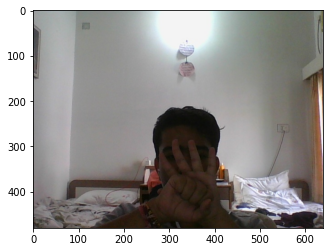

In [16]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python==4.5.1.48

In [18]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    print(ret,frame)
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

True [[[ 61  73  45]
  [ 62  74  46]
  [ 61  73  48]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[ 59  71  45]
  [ 62  74  49]
  [ 64  75  52]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[ 58  70  48]
  [ 62  74  52]
  [ 64  75  55]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 ...

 [[244 247 238]
  [244 247 238]
  [244 247 238]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[244 247 238]
  [244 247 238]
  [244 247 238]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[244 247 238]
  [244 247 238]
  [244 247 238]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]]
True [[[ 87  77  66]
  [ 87  78  67]
  [ 87  81  69]
  ...
  [110 106  88]
  [114 108  89]
  [112 105  86]]

 [[ 86  79  67]
  [ 87  81  69]
  [ 86  82  70]
  ...
  [109 107  87]
  [112 106  87]
  [113 106  86]]

 [[ 83  80  68]
  [ 83  82  69]
  [ 82  83  70]
  ...
  [111 109  88]
  [112 108  86]
  [117 112  90]]

 ...

 [[244 244 244]
  [244 244 244]
  [244 244

True [[[ 84  74  87]
  [ 85  75  89]
  [ 85  75  91]
  ...
  [244 244 244]
  [245 245 245]
  [245 245 245]]

 [[ 85  75  88]
  [ 85  75  89]
  [ 85  75  91]
  ...
  [245 245 245]
  [244 244 244]
  [244 244 244]]

 [[ 85  75  87]
  [ 85  75  88]
  [ 84  75  89]
  ...
  [244 244 244]
  [245 246 244]
  [241 242 240]]

 ...

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]]
True [[[ 79  83  70]
  [ 79  83  70]
  [ 81  85  72]
  ...
  [245 245 245]
  [244 244 244]
  [246 246 246]]

 [[ 71  75  63]
  [ 73  77  65]
  [ 77  81  69]
  ...
  [245 245 244]
  [244 245 243]
  [235 236 234]]

 [[ 66  69  60]
  [ 69  72  63]
  [ 74  77  68]
  ...
  [248 249 247]
  [234 235 232]
  [204 205 202]]

 ...

 [[244 244 244]
  [244 244 244]
  [244 244

True [[[ 28  30  25]
  [ 31  33  28]
  [ 30  32  29]
  ...
  [192 197 188]
  [193 198 189]
  [193 198 189]]

 [[ 26  28  22]
  [ 28  31  25]
  [ 27  31  26]
  ...
  [193 197 188]
  [192 197 188]
  [193 198 189]]

 [[ 26  31  21]
  [ 27  32  24]
  [ 26  32  25]
  ...
  [193 197 188]
  [193 197 188]
  [192 197 188]]

 ...

 [[188 181 201]
  [188 182 201]
  [188 182 200]
  ...
  [208 209 222]
  [206 209 221]
  [204 208 220]]

 [[187 180 202]
  [188 181 202]
  [188 181 202]
  ...
  [207 209 221]
  [206 209 221]
  [203 207 219]]

 [[187 179 202]
  [187 180 202]
  [188 181 202]
  ...
  [205 208 219]
  [204 208 219]
  [202 206 217]]]
True [[[ 31  27  27]
  [ 32  29  29]
  [ 33  31  31]
  ...
  [193 198 184]
  [193 199 182]
  [194 200 183]]

 [[ 32  29  29]
  [ 32  29  29]
  [ 32  30  30]
  ...
  [194 198 184]
  [194 198 183]
  [195 200 183]]

 [[ 32  30  30]
  [ 31  29  29]
  [ 31  29  29]
  ...
  [195 198 185]
  [195 199 184]
  [196 200 185]]

 ...

 [[189 180 207]
  [188 179 206]
  [187 178

True [[[ 26  31  24]
  [ 29  33  27]
  [ 29  33  28]
  ...
  [197 200 189]
  [197 200 188]
  [200 202 190]]

 [[ 25  30  23]
  [ 28  32  26]
  [ 29  33  28]
  ...
  [197 200 188]
  [198 200 188]
  [199 201 188]]

 [[ 26  30  25]
  [ 29  33  28]
  [ 30  34  30]
  ...
  [198 200 188]
  [197 200 186]
  [196 199 184]]

 ...

 [[188 188 199]
  [187 186 198]
  [187 185 198]
  ...
  [210 211 224]
  [209 210 223]
  [208 209 222]]

 [[188 186 198]
  [187 185 198]
  [188 185 198]
  ...
  [210 209 225]
  [210 209 225]
  [210 209 225]]

 [[187 185 197]
  [188 185 198]
  [189 184 198]
  ...
  [211 208 227]
  [211 208 227]
  [211 208 227]]]
True [[[ 33  29  29]
  [ 32  29  29]
  [ 31  29  28]
  ...
  [197 201 190]
  [197 201 190]
  [196 200 189]]

 [[ 33  29  29]
  [ 32  29  28]
  [ 32  29  28]
  ...
  [198 201 189]
  [198 201 189]
  [197 200 188]]

 [[ 32  28  27]
  [ 32  28  27]
  [ 31  28  27]
  ...
  [196 200 186]
  [197 201 187]
  [196 200 186]]

 ...

 [[189 182 207]
  [188 181 205]
  [188 182

True [[[ 28  29  27]
  [ 29  30  28]
  [ 29  31  29]
  ...
  [195 198 186]
  [195 198 186]
  [199 201 189]]

 [[ 28  30  28]
  [ 28  30  28]
  [ 27  30  28]
  ...
  [193 197 184]
  [195 198 186]
  [196 199 187]]

 [[ 26  30  29]
  [ 27  31  30]
  [ 25  30  29]
  ...
  [194 198 186]
  [194 198 186]
  [195 198 186]]

 ...

 [[187 179 202]
  [187 179 202]
  [188 180 203]
  ...
  [210 208 221]
  [209 207 221]
  [208 205 220]]

 [[187 179 202]
  [188 180 203]
  [189 182 204]
  ...
  [208 207 220]
  [208 205 220]
  [207 204 220]]

 [[188 180 203]
  [189 182 204]
  [190 183 204]
  ...
  [207 206 219]
  [208 205 220]
  [208 205 221]]]
True [[[ 28  31  30]
  [ 29  32  31]
  [ 29  32  31]
  ...
  [197 198 188]
  [197 198 189]
  [197 198 189]]

 [[ 29  30  30]
  [ 29  30  30]
  [ 29  30  30]
  ...
  [196 199 188]
  [196 198 189]
  [196 198 189]]

 [[ 30  29  29]
  [ 31  30  30]
  [ 30  30  30]
  ...
  [196 199 187]
  [197 200 189]
  [197 200 189]]

 ...

 [[189 183 204]
  [188 182 203]
  [189 183

True [[[ 31  33  28]
  [ 30  32  27]
  [ 29  31  26]
  ...
  [195 202 182]
  [196 203 183]
  [195 202 182]]

 [[ 28  30  25]
  [ 28  30  25]
  [ 28  30  25]
  ...
  [195 201 183]
  [195 201 184]
  [194 200 183]]

 [[ 28  30  25]
  [ 28  30  25]
  [ 29  31  26]
  ...
  [194 199 185]
  [195 200 186]
  [194 198 186]]

 ...

 [[188 181 202]
  [187 180 201]
  [187 180 201]
  ...
  [208 210 222]
  [207 208 222]
  [205 206 220]]

 [[188 181 202]
  [188 181 202]
  [187 180 201]
  ...
  [208 208 222]
  [207 208 222]
  [206 207 222]]

 [[189 182 203]
  [188 181 202]
  [187 180 201]
  ...
  [205 205 219]
  [205 206 221]
  [206 207 222]]]
True [[[ 22  31  28]
  [ 22  31  28]
  [ 23  31  28]
  ...
  [201 202 193]
  [200 200 193]
  [199 199 193]]

 [[ 24  32  29]
  [ 25  32  29]
  [ 24  31  28]
  ...
  [199 201 191]
  [198 200 191]
  [197 198 191]]

 [[ 28  32  30]
  [ 27  32  29]
  [ 27  31  29]
  ...
  [198 201 189]
  [197 200 189]
  [196 198 189]]

 ...

 [[190 182 206]
  [191 183 207]
  [191 183

True [[[ 39  39  39]
  [ 38  38  38]
  [ 38  38  38]
  ...
  [220 223 212]
  [221 224 213]
  [220 224 213]]

 [[ 39  39  39]
  [ 39  39  39]
  [ 38  38  38]
  ...
  [219 221 212]
  [218 221 212]
  [217 220 211]]

 [[ 39  40  38]
  [ 39  40  38]
  [ 39  39  39]
  ...
  [219 222 214]
  [217 220 212]
  [215 218 210]]

 ...

 [[212 204 228]
  [213 205 230]
  [212 203 229]
  ...
  [236 234 247]
  [235 233 246]
  [237 234 247]]

 [[212 204 228]
  [213 205 229]
  [212 204 229]
  ...
  [235 232 244]
  [237 233 245]
  [239 235 247]]

 [[212 204 227]
  [213 205 229]
  [211 203 227]
  ...
  [234 230 242]
  [236 232 243]
  [240 237 247]]]
True [[[ 38  42  47]
  [ 37  41  46]
  [ 36  39  44]
  ...
  [222 223 213]
  [221 222 213]
  [220 221 212]]

 [[ 37  43  46]
  [ 37  42  45]
  [ 37  40  44]
  ...
  [222 223 214]
  [221 222 213]
  [221 222 214]]

 [[ 34  42  42]
  [ 35  42  42]
  [ 35  40  42]
  ...
  [221 222 213]
  [221 221 214]
  [221 221 214]]

 ...

 [[212 206 224]
  [212 206 224]
  [212 206

True [[[ 36  37  34]
  [ 37  38  36]
  [ 37  37  37]
  ...
  [220 222 217]
  [221 223 217]
  [221 223 217]]

 [[ 35  36  33]
  [ 36  37  34]
  [ 37  38  36]
  ...
  [218 220 214]
  [219 221 215]
  [219 222 214]]

 [[ 35  36  32]
  [ 36  37  34]
  [ 37  38  35]
  ...
  [218 220 214]
  [219 222 214]
  [220 223 215]]

 ...

 [[214 205 232]
  [215 206 233]
  [215 206 233]
  ...
  [237 236 247]
  [238 236 246]
  [240 237 247]]

 [[214 205 232]
  [214 205 232]
  [215 206 233]
  ...
  [235 235 245]
  [237 236 246]
  [238 236 246]]

 [[212 203 230]
  [213 204 231]
  [213 204 231]
  ...
  [235 235 245]
  [237 236 246]
  [237 236 246]]]
True [[[ 38  41  38]
  [ 36  39  36]
  [ 35  38  35]
  ...
  [220 223 215]
  [220 223 215]
  [220 223 214]]

 [[ 38  41  39]
  [ 37  40  38]
  [ 36  39  37]
  ...
  [220 223 215]
  [219 222 214]
  [219 222 213]]

 [[ 36  39  38]
  [ 36  39  38]
  [ 36  39  38]
  ...
  [221 223 216]
  [220 223 215]
  [218 221 212]]

 ...

 [[215 205 228]
  [214 204 228]
  [212 201

True [[[ 43  43  43]
  [ 43  43  43]
  [ 42  42  43]
  ...
  [232 231 222]
  [232 231 221]
  [232 231 221]]

 [[ 44  43  43]
  [ 44  43  44]
  [ 43  42  45]
  ...
  [231 231 222]
  [232 232 223]
  [231 231 221]]

 [[ 46  42  44]
  [ 45  42  45]
  [ 44  42  46]
  ...
  [231 232 223]
  [231 232 223]
  [231 232 223]]

 ...

 [[223 215 239]
  [223 215 239]
  [223 215 239]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[223 216 237]
  [223 216 237]
  [223 216 237]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[224 218 237]
  [224 218 237]
  [224 217 238]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]]
True [[[ 40  41  45]
  [ 40  41  45]
  [ 40  41  45]
  ...
  [228 231 222]
  [230 233 224]
  [234 237 228]]

 [[ 41  41  44]
  [ 41  41  44]
  [ 41  41  44]
  ...
  [227 230 221]
  [229 232 223]
  [233 236 227]]

 [[ 42  41  44]
  [ 42  41  44]
  [ 42  41  44]
  ...
  [227 231 220]
  [228 232 221]
  [231 235 224]]

 ...

 [[221 215 240]
  [221 214 239]
  [220 213

True [[[ 48  43  45]
  [ 48  43  45]
  [ 47  42  44]
  ...
  [239 241 221]
  [238 240 221]
  [238 240 221]]

 [[ 48  43  47]
  [ 48  43  47]
  [ 48  43  47]
  ...
  [238 240 221]
  [238 240 221]
  [237 239 221]]

 [[ 47  42  49]
  [ 48  44  50]
  [ 48  44  50]
  ...
  [236 238 220]
  [236 237 220]
  [236 237 220]]

 ...

 [[232 224 239]
  [231 223 238]
  [230 223 238]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[233 222 238]
  [230 220 236]
  [230 221 236]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[232 221 237]
  [230 219 235]
  [228 218 234]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]]
True [[[ 45  45  46]
  [ 45  45  46]
  [ 45  45  45]
  ...
  [243 239 225]
  [242 238 224]
  [240 237 223]]

 [[ 45  44  45]
  [ 45  44  45]
  [ 46  45  45]
  ...
  [243 238 223]
  [241 237 222]
  [241 237 222]]

 [[ 43  42  42]
  [ 44  43  43]
  [ 45  44  44]
  ...
  [241 237 220]
  [241 237 220]
  [241 238 221]]

 ...

 [[233 220 239]
  [233 219 238]
  [232 218

True [[[ 40  45  38]
  [ 41  45  37]
  [ 41  45  35]
  ...
  [236 234 216]
  [236 235 215]
  [237 236 216]]

 [[ 39  43  38]
  [ 39  42  36]
  [ 39  43  35]
  ...
  [236 235 216]
  [237 236 216]
  [238 237 217]]

 [[ 38  41  39]
  [ 38  41  39]
  [ 39  41  38]
  ...
  [236 236 217]
  [237 237 217]
  [237 237 217]]

 ...

 [[222 219 234]
  [223 219 234]
  [222 218 234]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[222 219 235]
  [221 218 234]
  [222 217 235]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[222 219 235]
  [221 218 234]
  [220 216 234]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]]
True [[[ 44  42  42]
  [ 43  41  41]
  [ 43  41  41]
  ...
  [234 234 218]
  [234 234 218]
  [235 235 219]]

 [[ 44  43  44]
  [ 43  42  43]
  [ 43  42  42]
  ...
  [234 234 218]
  [235 235 219]
  [235 235 219]]

 [[ 45  43  46]
  [ 44  42  45]
  [ 44  42  44]
  ...
  [234 235 220]
  [235 236 221]
  [234 235 220]]

 ...

 [[226 218 239]
  [225 217 237]
  [225 216

True [[[ 39  42  40]
  [ 42  44  42]
  [ 44  45  43]
  ...
  [241 239 218]
  [241 240 217]
  [245 243 219]]

 [[ 39  41  38]
  [ 42  43  40]
  [ 44  45  42]
  ...
  [240 240 220]
  [240 240 217]
  [243 242 219]]

 [[ 41  42  36]
  [ 43  44  38]
  [ 43  44  38]
  ...
  [239 241 222]
  [238 240 219]
  [240 242 220]]

 ...

 [[232 217 241]
  [233 217 241]
  [235 219 241]
  ...
  [ 94  94 112]
  [ 98  96 113]
  [119 116 132]]

 [[231 217 243]
  [231 217 242]
  [232 217 241]
  ...
  [ 91  94 116]
  [ 89  88 111]
  [101  99 123]]

 [[229 215 243]
  [229 216 242]
  [230 216 241]
  ...
  [ 90  94 118]
  [ 92  92 119]
  [105 104 132]]]
True [[[ 50  41  44]
  [ 50  41  44]
  [ 49  41  44]
  ...
  [238 238 214]
  [238 238 214]
  [237 237 213]]

 [[ 49  42  44]
  [ 48  42  44]
  [ 48  42  44]
  ...
  [239 241 216]
  [239 241 215]
  [239 241 215]]

 [[ 45  42  41]
  [ 45  42  41]
  [ 46  43  43]
  ...
  [236 241 214]
  [236 241 213]
  [236 242 214]]

 ...

 [[227 220 234]
  [227 220 234]
  [227 220

True [[[ 46  43  45]
  [ 46  43  45]
  [ 47  45  45]
  ...
  [238 241 218]
  [240 243 218]
  [242 245 220]]

 [[ 45  43  46]
  [ 45  43  46]
  [ 47  45  47]
  ...
  [238 241 218]
  [239 242 218]
  [239 242 217]]

 [[ 46  43  48]
  [ 46  44  48]
  [ 47  45  48]
  ...
  [239 242 220]
  [238 241 218]
  [237 240 217]]

 ...

 [[226 219 240]
  [226 219 240]
  [226 218 239]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[226 220 239]
  [226 220 239]
  [225 219 238]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[225 219 238]
  [225 219 238]
  [225 219 238]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]]
True [[[ 43  42  46]
  [ 44  43  47]
  [ 44  44  48]
  ...
  [236 240 219]
  [236 241 219]
  [237 243 219]]

 [[ 44  43  46]
  [ 42  42  45]
  [ 42  42  45]
  ...
  [239 242 221]
  [238 242 220]
  [237 242 220]]

 [[ 44  45  47]
  [ 43  44  46]
  [ 42  42  45]
  ...
  [240 242 223]
  [241 244 223]
  [240 244 223]]

 ...

 [[233 220 239]
  [233 220 239]
  [234 221

True [[[ 44  43  41]
  [ 45  43  42]
  [ 47  45  45]
  ...
  [238 239 223]
  [238 237 223]
  [239 238 224]]

 [[ 45  42  41]
  [ 46  43  42]
  [ 47  44  44]
  ...
  [238 239 223]
  [238 237 223]
  [238 237 223]]

 [[ 48  44  44]
  [ 48  43  44]
  [ 48  43  44]
  ...
  [238 239 223]
  [238 237 223]
  [237 236 222]]

 ...

 [[230 221 231]
  [229 220 230]
  [228 220 231]
  ...
  [241 242 242]
  [244 245 246]
  [241 243 244]]

 [[230 221 231]
  [229 220 230]
  [229 219 231]
  ...
  [243 243 242]
  [243 244 245]
  [242 244 245]]

 [[231 222 232]
  [230 221 231]
  [229 219 232]
  ...
  [246 245 244]
  [243 244 245]
  [242 244 245]]]
True [[[ 50  47  49]
  [ 47  44  46]
  [ 46  44  44]
  ...
  [241 242 223]
  [241 244 222]
  [239 242 219]]

 [[ 47  45  46]
  [ 46  44  44]
  [ 46  44  44]
  ...
  [240 241 222]
  [240 243 222]
  [239 242 220]]

 [[ 45  43  42]
  [ 46  44  43]
  [ 45  45  43]
  ...
  [237 239 220]
  [239 240 221]
  [240 241 222]]

 ...

 [[229 220 239]
  [228 220 238]
  [230 221

True [[[ 69  66  68]
  [ 72  68  70]
  [ 75  67  70]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[ 68  65  65]
  [ 71  66  67]
  [ 73  66  67]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[ 69  65  61]
  [ 70  65  62]
  [ 73  66  64]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 ...

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]]
True [[[ 78  61  68]
  [ 77  60  67]
  [ 78  60  67]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[ 73  60  66]
  [ 75  61  67]
  [ 77  62  67]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[ 70  62  67]
  [ 71  63  67]
  [ 74  65  69]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 ...

 [[244 244 244]
  [244 244 244]
  [244 244

True [[[ 68  61  46]
  [ 65  59  44]
  [ 64  59  47]
  ...
  [246 251 223]
  [246 251 223]
  [246 252 222]]

 [[ 67  59  46]
  [ 65  58  46]
  [ 63  58  47]
  ...
  [245 251 224]
  [245 251 223]
  [245 251 223]]

 [[ 68  59  50]
  [ 66  58  49]
  [ 64  56  49]
  ...
  [244 251 225]
  [244 251 224]
  [244 251 224]]

 ...

 [[185 171 172]
  [172 159 162]
  [166 152 159]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[182 168 167]
  [176 161 162]
  [166 151 156]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[187 172 170]
  [191 175 175]
  [174 158 162]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]]
True [[[ 46  52  27]
  [ 47  53  30]
  [ 49  53  34]
  ...
  [243 249 232]
  [243 249 232]
  [242 248 231]]

 [[ 48  54  33]
  [ 49  54  35]
  [ 50  54  39]
  ...
  [242 248 230]
  [242 248 230]
  [242 248 230]]

 [[ 50  53  42]
  [ 51  54  43]
  [ 51  53  44]
  ...
  [242 249 229]
  [242 249 229]
  [242 249 229]]

 ...

 [[243 243 240]
  [244 243 240]
  [244 243

True [[[ 98  83  87]
  [102  88  91]
  [103  90  91]
  ...
  [126 145 159]
  [130 151 166]
  [127 150 166]]

 [[ 94  78  82]
  [ 97  81  84]
  [ 97  83  84]
  ...
  [132 149 162]
  [134 154 168]
  [130 151 165]]

 [[ 96  78  81]
  [ 96  80  82]
  [ 95  80  81]
  ...
  [135 150 160]
  [135 152 162]
  [130 149 158]]

 ...

 [[ 88  97 125]
  [ 88  96 126]
  [ 87  95 126]
  ...
  [164 171 177]
  [143 153 159]
  [132 143 150]]

 [[ 86  96 124]
  [ 86  96 125]
  [ 86  95 126]
  ...
  [168 174 181]
  [152 161 168]
  [143 153 161]]

 [[ 85  96 124]
  [ 85  96 125]
  [ 85  95 126]
  ...
  [184 189 197]
  [164 172 180]
  [147 157 165]]]
True [[[100  94  59]
  [100  94  60]
  [101  95  64]
  ...
  [139 155 178]
  [137 154 175]
  [137 154 175]]

 [[100  95  61]
  [ 98  93  61]
  [ 98  93  64]
  ...
  [139 155 177]
  [138 155 176]
  [139 156 177]]

 [[ 95  92  62]
  [ 94  91  63]
  [ 94  91  66]
  ...
  [138 155 176]
  [136 153 174]
  [138 155 176]]

 ...

 [[ 95 100 125]
  [ 96 101 126]
  [ 97 102

True [[[158 125 110]
  [144 113  98]
  [133 107  91]
  ...
  [154 156 148]
  [145 147 138]
  [160 161 151]]

 [[146 119 103]
  [137 111  95]
  [131 109  92]
  ...
  [141 143 135]
  [133 135 126]
  [142 143 133]]

 [[132 116  97]
  [129 113  94]
  [128 113  94]
  ...
  [125 127 119]
  [127 129 120]
  [132 133 123]]

 ...

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [160 175 198]
  [164 180 203]
  [165 182 205]]

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [161 176 199]
  [161 178 201]
  [159 177 200]]

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [158 173 196]
  [159 176 199]
  [158 176 199]]]
True [[[133 106 110]
  [134 107 110]
  [133 108 109]
  ...
  [167 175 182]
  [168 175 179]
  [149 154 157]]

 [[134 109 111]
  [134 109 110]
  [132 108 108]
  ...
  [146 155 162]
  [141 148 152]
  [125 131 134]]

 [[132 111 110]
  [131 110 109]
  [130 108 106]
  ...
  [108 118 125]
  [104 113 118]
  [102 110 114]]

 ...

 [[244 244 244]
  [244 244 244]
  [244 244

True [[[ 94  78  79]
  [ 93  78  77]
  [ 93  78  75]
  ...
  [100  79  64]
  [114  92  81]
  [134 111 102]]

 [[ 92  77  78]
  [ 94  78  78]
  [ 93  78  76]
  ...
  [112  91  76]
  [136 114 102]
  [151 128 117]]

 [[ 91  77  79]
  [ 91  77  78]
  [ 92  78  77]
  ...
  [123 102  87]
  [167 145 130]
  [178 156 141]]

 ...

 [[244 247 239]
  [244 247 239]
  [244 246 241]
  ...
  [114 132 155]
  [113 131 154]
  [112 130 153]]

 [[244 247 239]
  [244 246 240]
  [244 245 241]
  ...
  [112 130 153]
  [114 132 155]
  [113 131 154]]

 [[244 246 240]
  [244 246 240]
  [244 245 242]
  ...
  [111 129 152]
  [112 130 153]
  [112 130 153]]]
True [[[ 95  74  76]
  [ 95  76  77]
  [ 93  77  79]
  ...
  [105 100  78]
  [160 156 131]
  [158 154 129]]

 [[ 95  76  76]
  [ 95  77  77]
  [ 94  78  79]
  ...
  [127 122 100]
  [165 161 136]
  [158 154 129]]

 [[ 93  77  74]
  [ 94  78  76]
  [ 93  79  77]
  ...
  [143 138 114]
  [165 160 135]
  [158 153 128]]

 ...

 [[244 245 241]
  [244 245 242]
  [244 245

True [[[ 89  84  76]
  [ 90  82  75]
  [ 90  80  73]
  ...
  [144 155 159]
  [145 158 164]
  [147 160 168]]

 [[ 90  83  77]
  [ 91  83  77]
  [ 91  81  75]
  ...
  [147 158 160]
  [144 156 161]
  [147 159 165]]

 [[ 90  82  76]
  [ 90  82  76]
  [ 91  80  75]
  ...
  [147 155 155]
  [147 155 158]
  [150 159 163]]

 ...

 [[244 245 241]
  [244 245 242]
  [244 245 242]
  ...
  [ 99 106 125]
  [101 109 126]
  [106 114 131]]

 [[244 245 242]
  [244 245 242]
  [244 245 243]
  ...
  [100 110 128]
  [ 97 107 124]
  [102 114 129]]

 [[244 245 242]
  [244 245 243]
  [244 244 244]
  ...
  [102 113 132]
  [106 117 134]
  [103 116 132]]]
True [[[100  79  72]
  [101  81  74]
  [101  84  77]
  ...
  [128 119 132]
  [140 136 148]
  [158 156 168]]

 [[ 98  80  73]
  [ 97  80  73]
  [ 97  83  75]
  ...
  [132 124 135]
  [145 141 151]
  [157 155 165]]

 [[ 93  83  76]
  [ 93  83  76]
  [ 94  83  76]
  ...
  [125 120 125]
  [138 134 139]
  [154 151 156]]

 ...

 [[244 247 239]
  [244 247 239]
  [244 246

True [[[154 134 117]
  [152 134 118]
  [147 134 119]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[153 134 118]
  [150 133 117]
  [148 134 119]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[149 131 117]
  [148 131 117]
  [147 133 119]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 ...

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [192 189 182]
  [199 195 187]
  [206 202 194]]

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [188 185 180]
  [194 192 185]
  [208 206 199]]

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [181 178 174]
  [185 182 177]
  [201 199 193]]]
True [[[187 181 152]
  [187 181 153]
  [190 183 160]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[187 181 152]
  [186 180 152]
  [183 176 152]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[185 180 149]
  [179 173 144]
  [171 164 138]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 ...

 [[244 244 244]
  [244 244 244]
  [244 244

# 10. Freezing the Graph

In [17]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [18]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [19]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


# 11. Conversion to TFJS

In [19]:
!pip install tensorflowjs

In [20]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [21]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport
